In [1]:
import networkx as nx
from itertools import permutations

def compute_W(s_i, adopted, story_graph):
    total = 0
    for s_j in adopted:
        total += 1 / nx.shortest_path_length(story_graph, source=s_i, target=s_j)
    return total / story_graph.number_of_nodes()

def compute_path_probability(path, story_graph, epsilon):
    prob = 1
    adopted = set()
    for s in path:
        if not adopted:  # if nothing has been adopted yet
            prob *= epsilon
        else:
            w = compute_W(s, adopted, story_graph)
            prob *= w
        adopted.add(s)
    return prob

def compute_probabilities_for_all_paths(story_graph, epsilon):
    all_probs = []
    all_paths = permutations(story_graph.nodes())
    for path in all_paths:
        prob = compute_path_probability(path, story_graph, epsilon)
        all_probs.append(prob)
    return all_probs

# Example
# Create a linear story graph

In [2]:
import matplotlib.pyplot as plt

def plot_histogram(data, bins=None, title="Histogram", xlabel="Value", ylabel="Frequency"):
    """
    Plot a histogram for a given list of numbers.

    :param data: List of numbers.
    :param bins: Number of bins or a sequence. Default is auto.
    :param title: Title of the histogram.
    :param xlabel: Label for x-axis.
    :param ylabel: Label for y-axis.
    """
    
    plt.hist(data, bins=bins, edgecolor="k", alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [3]:
def generate_linear_graph(size):
    """
    Generate a linear graph with the given number of nodes.
    
    :param size: Number of nodes in the graph.
    :return: A networkx Graph object representing the linear graph.
    """
    
    # Create an empty graph
    G = nx.Graph()
    
    # Add nodes and edges to create a linear structure
    for i in range(size - 1):
        G.add_edge(i, i+1)
        
    return G

In [6]:
g = generate_linear_graph(5)
list(g.nodes())

[0, 1, 2, 3, 4]

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_tree(n, b):
    """
    Generates a tree graph with n nodes and branching factor b.
    
    Parameters:
    - n: Total number of nodes.
    - b: Branching factor.

    Returns:
    - G: A networkx graph.
    """
    if n < 1:
        raise ValueError("The number of nodes, n, should be at least 1.")
    if b < 1:
        raise ValueError("The branching factor, b, should be at least 1.")

    G = nx.Graph()
    node_counter = 1
    queue = [(0, 0)]  # (node, depth)
    
    while queue and node_counter < n:
        current_node, depth = queue.pop(0)
        for i in range(b):
            if node_counter >= n:
                break
            child_node = node_counter
            G.add_edge(current_node, child_node)
            queue.append((child_node, depth + 1))
            node_counter += 1

    return G

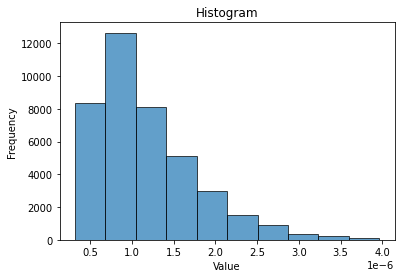

In [38]:
story_graph = generate_linear_graph(8)
probs = compute_probabilities_for_all_paths(story_graph,.1)
plot_histogram(probs)

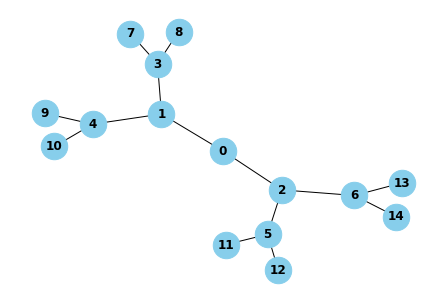

In [36]:
G = generate_tree(15, 2)
nx.draw(G, with_labels=True, node_size=700, node_color='skyblue', font_weight='bold')
plt.show()

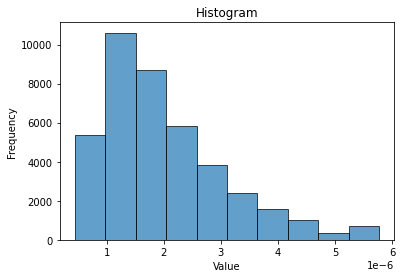

In [41]:
story_graph = generate_tree(8,2)
probs = compute_probabilities_for_all_paths(story_graph,.1)
plot_histogram(probs)

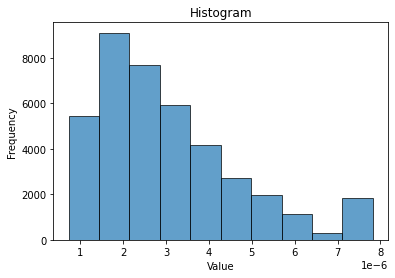

In [42]:
story_graph = generate_tree(8,3)
probs = compute_probabilities_for_all_paths(story_graph,.1)
plot_histogram(probs)

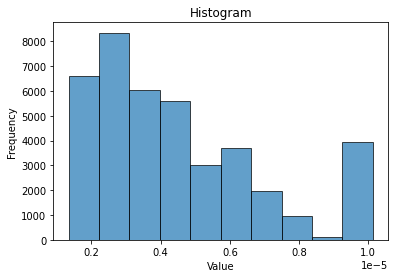

In [45]:
story_graph = generate_tree(8,5)
probs = compute_probabilities_for_all_paths(story_graph,.1)
plot_histogram(probs)

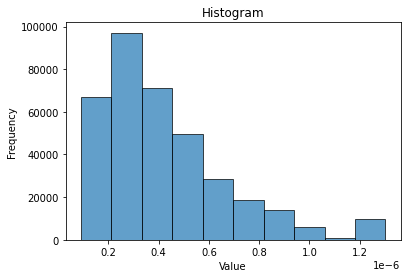

In [43]:
story_graph = generate_tree(9,3)
probs = compute_probabilities_for_all_paths(story_graph,.1)
plot_histogram(probs)

# Graphing